<a href="https://colab.research.google.com/github/onepiece-nika/onepiece-nika/blob/main/TitanicSurvivalCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code genereted by AgusV  - github : https://github.com/onepiece

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
# Abrimos la base de datos y la exploramos, sólo vamos a usar train.csv como base para aprender a como separar en dos - train y test

titanic = pd.read_csv("train.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Calculamos la probabilidad de sobrevivir sin usar ninguna característica

print("número de supervivientes:" , sum(titanic.Survived))
print("número de pasajeros:" , len(titanic))

survive_prob = sum(titanic.Survived) / len(titanic)
print("La probabilidad de sobrevivir es: ", np.round(survive_prob,2))

número de supervivientes: 342
número de pasajeros: 891
La probabilidad de sobrevivir es:  0.38


In [9]:
# Si marcamos a todos los pasajeros como fallecidos, nuestra predicción tendría una exactitud/precision, "accuracy" del [62%]
# Nuestro modelo de machine learning que estamos por crear tiene que ser mejor que esta predicción

print(round(1-survive_prob,2))

0.62


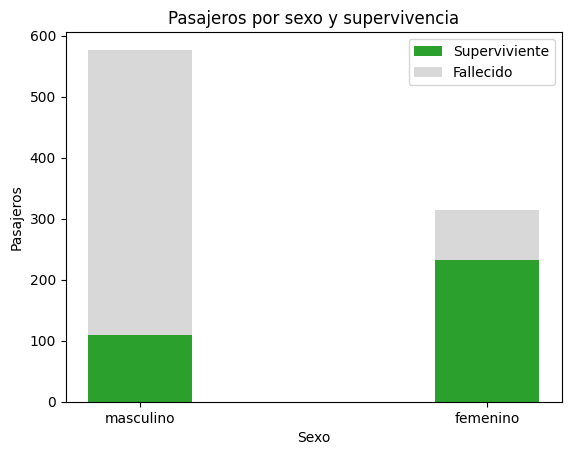

In [10]:
# Análisis de datos exploratorio

labels_Sex = ['masculino', 'femenino']
# Supervivientes por sexo
male_survived = sum(titanic.loc[titanic['Sex']=='male'].Survived) # Suma la variable 'Supervivientes' para las filas que tienen 'Sexo'='masculino'
female_survived = sum(titanic.loc[titanic['Sex']=='female'].Survived) # Suma la variable 'Supervivientes' para las filas que tienen 'Sexo'='femenino'
Sex_survived = [male_survived, female_survived]
# Fallecidos por sexo
total_males = len(titanic.loc[titanic['Sex']=='male'].Survived) # Número de hombres a bordo
total_females = len(titanic.loc[titanic['Sex']=='female'].Survived) # Number de mujeres a bordo
male_died = total_males - male_survived
female_died = total_females - female_survived
Sex_died = [male_died, female_died]

# Gráfica
fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_Sex, Sex_survived, width, label='Superviviente',color='tab:green')
ax.bar(labels_Sex, Sex_died, width, bottom=Sex_survived,label='Fallecido',color='gray',alpha=0.3)
ax.set_xlabel('Sexo')
ax.set_ylabel('Pasajeros')
ax.set_title('Pasajeros por sexo y supervivencia')
ax.legend()
plt.show()

In [11]:
print('Proporción de pasajeros hombres que sobrevivieron:',round(male_survived*100/(male_survived+male_died),1),'%')
print('Proporción de pasajeras mujeres que sobrevivieron:',round(female_survived*100/(female_survived+female_died),1),'%')

Proporción de pasajeros hombres que sobrevivieron: 18.9 %
Proporción de pasajeras mujeres que sobrevivieron: 74.2 %


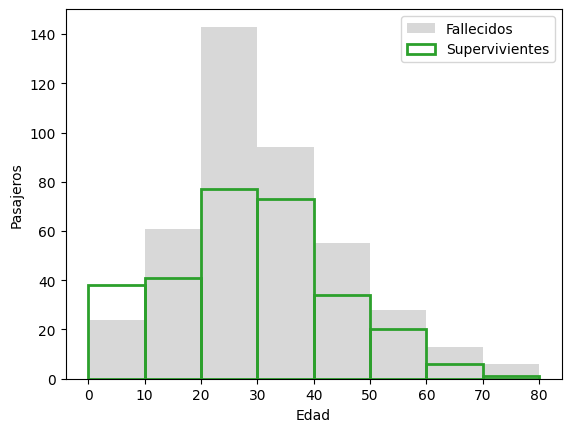

In [12]:
bins_age = [0,10,20,30,40,50,60,70,80]  #Promedio de fallecidos por edad

fig, ax = plt.subplots(1, 1)
ax.hist(titanic.loc[titanic['Survived']==0].Age,bins=bins_age,color='gray',alpha=0.3,label='Fallecidos')
ax.hist(titanic.loc[titanic['Survived']==1].Age,bins=bins_age,facecolor='none',edgecolor='tab:green',linewidth=2,label='Supervivientes')
ax.set_xlabel('Edad')
ax.set_ylabel('Pasajeros')
ax.legend()
plt.show()

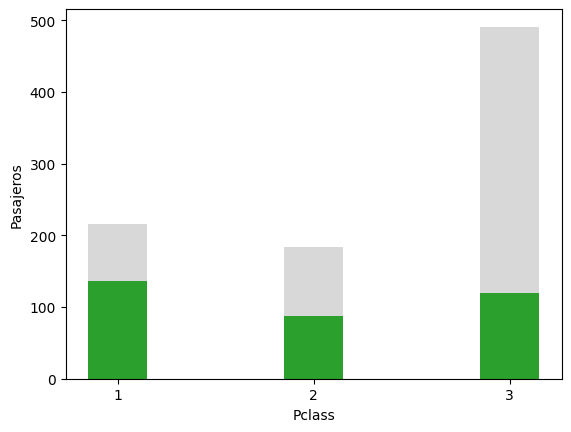

In [13]:
# Pasajeros por clase y supervivencia
labels_Pclass = ['1', '2', '3']
Pclass1_survived = sum(titanic.loc[titanic['Pclass']==1].Survived)
Pclass2_survived = sum(titanic.loc[titanic['Pclass']==2].Survived)
Pclass3_survived = sum(titanic.loc[titanic['Pclass']==3].Survived)
Pclass_survived = [Pclass1_survived, Pclass2_survived, Pclass3_survived]
Pclass1_died = len(titanic.loc[titanic['Pclass']==1].Survived)-Pclass1_survived
Pclass2_died = len(titanic.loc[titanic['Pclass']==2].Survived)-Pclass2_survived
Pclass3_died = len(titanic.loc[titanic['Pclass']==3].Survived)-Pclass3_survived
Pclass_died = [Pclass1_died, Pclass2_died, Pclass3_died]


# Gráfica
fig, (ax1) = plt.subplots(1,1)

# Clase
ax1.bar(labels_Pclass, Pclass_survived, width, label='Superviviente',color='tab:green')
ax1.bar(labels_Pclass, Pclass_died, width, bottom=Pclass_survived,label='Fallecido',color='gray',alpha=0.3)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Pasajeros')
plt.show()

In [15]:
# Data Clean

titanic = titanic.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [16]:
# Vamos por cada característica y contamos el número de datos faltantes o Nans

Features = titanic.columns.tolist()
print(Features)
for feature in Features:
    num = 0
    for i in range(0,len(titanic)):
        if pd.isnull(titanic.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs para', feature ,'son', num)
Features = titanic.columns.tolist()
print(Features)
for feature in Features:
    num = 0
    for i in range(0,len(titanic)):
        if pd.isnull(titanic.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs para', feature ,'son', num)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
NaNs para Survived son 0
NaNs para Pclass son 0
NaNs para Sex son 0
NaNs para Age son 177
NaNs para SibSp son 0
NaNs para Parch son 0
NaNs para Fare son 0
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
NaNs para Survived son 0
NaNs para Pclass son 0
NaNs para Sex son 0
NaNs para Age son 177
NaNs para SibSp son 0
NaNs para Parch son 0
NaNs para Fare son 0


In [17]:
# Reemplazamos los NaNs in "Edad" con el promedio de todos los pasajeros (mejora esto después!)

mean_age = titanic.Age.mean()
print('Edad promedio de los pasajeros:', np.round(mean_age,2), 'años')
#titanic = titanic
titanic['Age'] = titanic['Age'].fillna(mean_age)

Edad promedio de los pasajeros: 29.7 años


In [18]:
# Convierte los objetos dr texto a numéricos
if titanic.Sex[0] == 'male' or titanic.Sex[0] == 'female':
    titanic['Sex']=titanic['Sex'].map({'male' : 0, 'female' : 1})

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [19]:
# Generamos el modelo Algoritmo de ML: Árbol de decisión

from sklearn.model_selection import train_test_split
X=titanic.drop(['Survived'],axis=1) # creamos una base con las variables de entrada
X_names = Features[1:] # Removemos 'Supervivientes' de los nombres de nuestras características
y=titanic['Survived'] # Variable objetivo
y_names=['Died','Survived'] # Etiquetas de la variable objetivo

#Establecemos el tamaño de base de prueba en una proporción de 3 a 1.
#y ponemos estratificar en sí para que cada parte del conjunto de datos sea una representación del conjunto de datos en general
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=10) #Elige la profundidad del árbol
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)

from sklearn import metrics
# Para obtener el accuracy del modelo, es decir, que tan bueno es en predecir
print("Accuracy en el set de prueba:",np.round(metrics.accuracy_score(y_test, y_pred),2))

# Obten la importancia de tus características
feature_importances_dict = {}
for i, name in enumerate(X_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Características por orden de importancia (reverse=True para orden descendente)
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))

# El método items() devuelve un tuple tipo (key,value)
print('Características en orden de importancia:')
for key in feature_importances_sorted:
    print(key)

Accuracy en el set de prueba: 0.84
Características en orden de importancia:
Sex
Pclass
Fare
Age
SibSp
Parch


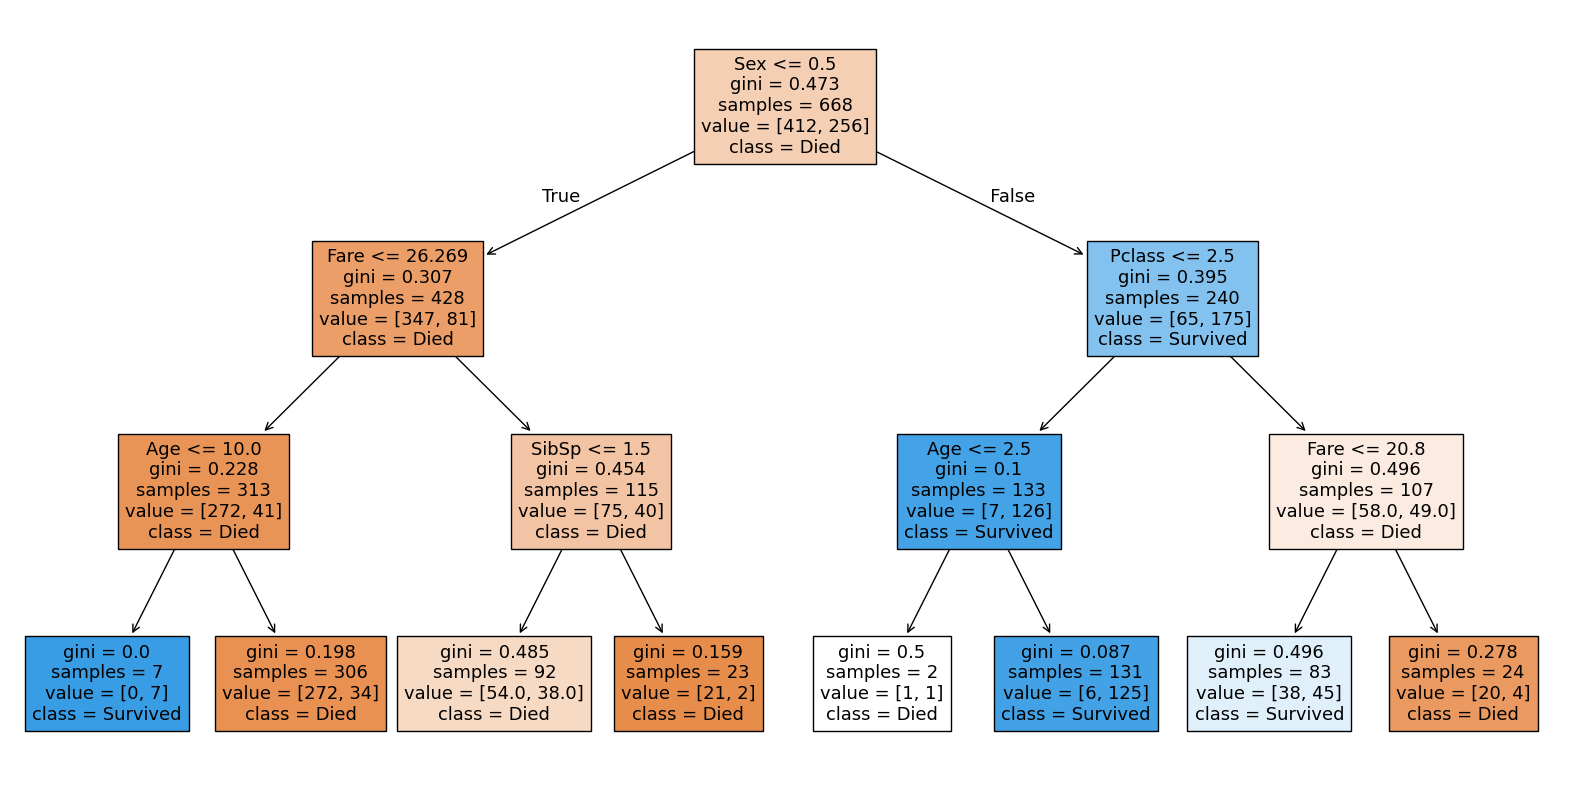

In [21]:
from matplotlib import pyplot as plt     # Visualización del modelo
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_names,class_names=y_names,filled=True)

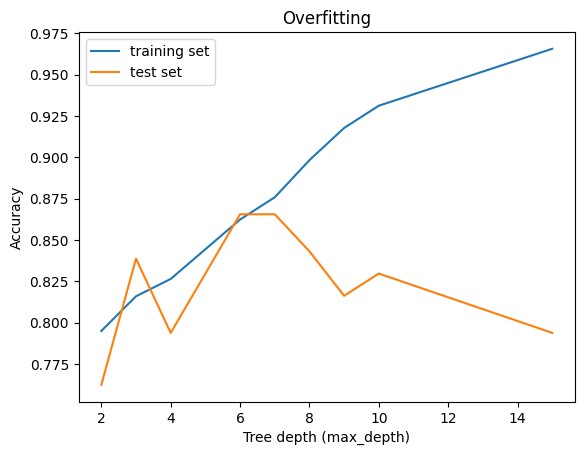

In [22]:
# Para ver como cambia el accuracy de nuestro modelo dependiento que tan profundo es nuestro arbol

max_depth_vals = [2,3,4,5,6,7,8,9,10,15]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    decision_tree.fit(X_train,y_train)
    # Training set
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test set')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()